In [691]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [692]:
df = pd.read_csv("BalajiFastFoodSales.csv")
df['date']=df['date'].str.replace("-","/")

df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07/03/2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02/03/2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10/02/2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05/03/2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06/10/2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [693]:
df=df.drop(columns=['order_id'])

In [694]:
# Function to map time to categories
def map_time_to_category(date_value):
    dv=date_value.split("/")
    dv[1]="1"
    return "/".join(dv)

# # Apply the function to the time_column
df['date'] = df['date'].apply(map_time_to_category)

In [695]:
df['date']=pd.to_datetime(df['date'],format="%m/%d/%Y")

In [696]:
df['date']=df['date'].dt.to_period('M')
def f(time_of_sale):
    if(time_of_sale=='Afternoon'):
        return 2
    elif(time_of_sale=='Evening'):
        return 3
    elif(time_of_sale=='Night'):
        return 4
    elif(time_of_sale=='Midnight'):
        return 5
    elif(time_of_sale=='Morning'):
        return 1
    else:
        return 0
    
monthly_sales = df.groupby(['date','time_of_sale'])['transaction_amount'].sum().reset_index()
monthly_sales['date']=monthly_sales['date'].dt.month
monthly_sales['time_of_sale']=monthly_sales['time_of_sale'].apply(f)
monthly_sales

,date,time_of_sale,transaction_amount
0,4,2,4940
1,4,3,2830
2,4,5,3375
3,4,1,3745
4,4,4,2780
5,5,2,3400
6,5,3,5260
7,5,5,3785
8,5,1,7380
9,5,4,6745


In [697]:
independentFeatures=['date','time_of_sale']
dependentFeatures=['transaction_amount']
X=monthly_sales[independentFeatures]
y=monthly_sales[dependentFeatures]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

# Define time ranges for morning, afternoon, and evening



In [698]:
X_morning=monthly_sales.loc[monthly_sales['time_of_sale']==1]
Y_morning=X_morning['transaction_amount']
X_morning=X_morning['date']

In [699]:
linearRegression=LinearRegression()

In [700]:
linearRegression.fit(X_train,y_train)
y_pred=linearRegression.predict(X_test)
y_pred
print("Coefficient of date,Coefficient of time_of_sale: ",linearRegression.coef_)
print("Intercept: ",linearRegression.intercept_)

Coefficient of date,Coefficient of time_of_sale:  [[-88.81885882 501.08764966]]
Intercept:  [3962.80406908]


In [701]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3977805.3400542806
1585.9136023865146
1994.4436166646278


In [702]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

-0.7452751328810505
-0.874554772353721


In [703]:
X_test['date']+X_test['time_of_sale']
y_test.shape

(30, 1)

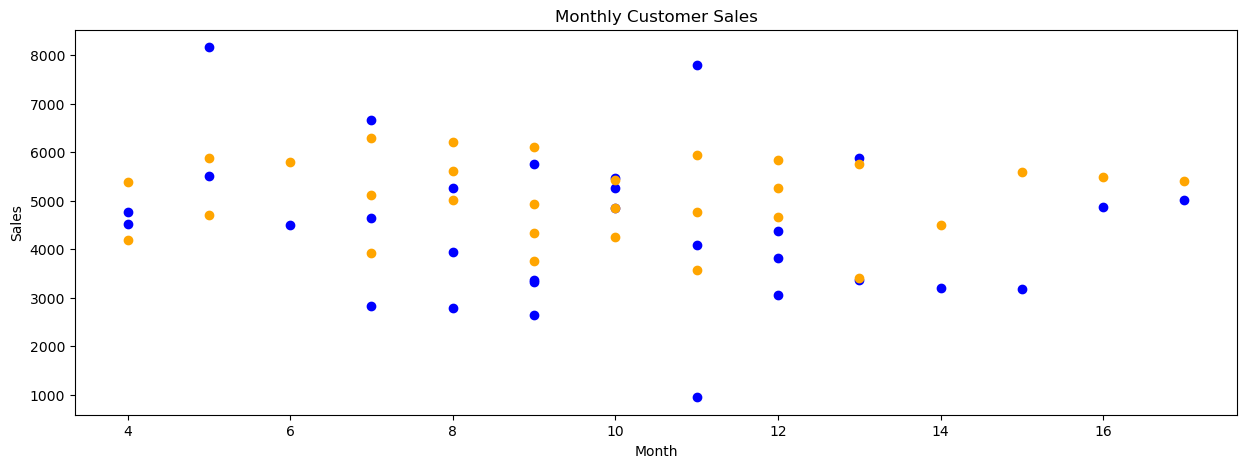

In [704]:
plt.figure(figsize=(15,5))
plt.scatter(X_test['date']+X_test['time_of_sale'],y_test,c="blue") 
plt.scatter(X_test['date']+X_test['time_of_sale'],y_pred,c="orange") 
plt.xlabel ("Month") 
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()

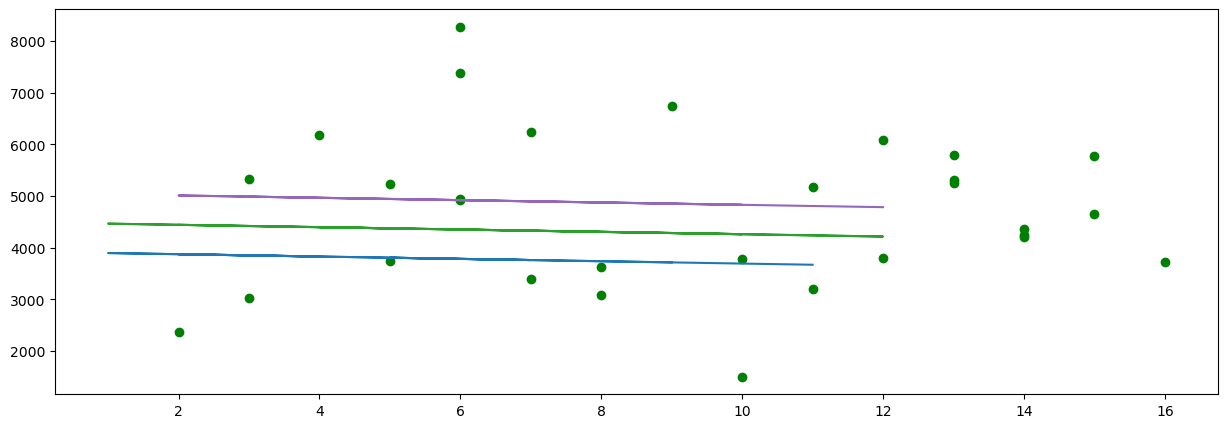

In [705]:
X_plot=X_train.loc[X_train['time_of_sale']==1]
Y_plot=(X_plot*(-22.7))+3920
plt.figure(figsize=(15,5))
plt.plot(X_plot,Y_plot)
plt.scatter(X_train['date']+X_train['time_of_sale'],y_train,c="green")
X2_plot=X_train.loc[X_train['time_of_sale']==2]
Y2_plot=(X2_plot*(-22.7))+4489
X3_plot=X_train.loc[X_train['time_of_sale']==3]
Y3_plot=(X3_plot*(-22.7))+5058
plt.plot(X2_plot,Y2_plot)
plt.plot(X3_plot,Y3_plot)

